<a href="https://colab.research.google.com/github/aborundiya/CNN/blob/master/CIFAR_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.optim as optim 
from torchvision import  models 

#checking if the GPU Is availbale

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#Loading and Transforming the images 

In [0]:
transform_train = transforms.Compose([
                                      transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
transform_test = transforms.Compose([
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [5]:
train_set = torchvision.datasets.CIFAR10('./data',train=True, download=True, transform=transform_train)
test_set = torchvision.datasets.CIFAR10('./data',train=False, download=True,transform=transform_test)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#Visualization of the dataset using dataloader and custom imshow 

In [6]:
num_classes = 10 
batch_size = 4 
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
images , labels = iter(train_dataloader).next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
4


In [0]:
def imshow(img, title):
  nimg = img.numpy() / 2 + 0.5  # convert the image to numpy and re-normalize 
  plt.figure(figsize = (batch_size,1))
  plt.axis("off")
  plt.imshow(np.transpose(nimg,(1,2,0)))  # converting the image to suit the built in imshow axis x,y,z 
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images, labels = iter(dataloader).next()
  img = torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])
  

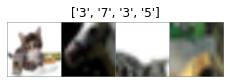

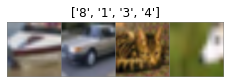

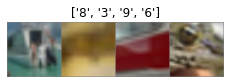

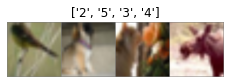

In [9]:

for i in range(4):
  show_batch_images(train_dataloader)

# Creating the VGG16 Net 

In [0]:
vgg = models.vgg16_bn()

In [11]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [12]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [13]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [14]:
final_in_features = vgg.classifier[6].in_features  # store the in_features counts based on the layer we need to modify 
mod_classifier = list(vgg.classifier.children())[:-1]  # take complete network structure except the one we need to modify
mod_classifier.extend([nn.Linear(final_in_features,num_classes)]) # add/modify the struture as per our needs
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [15]:
vgg.classifier = nn.Sequential(*mod_classifier)  # linked the new modified classifer to orginial network 
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#Training the VGG16

In [0]:
batch_size = 16 
trainloader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

In [0]:
def evaluation(dataloader, model):
  total , correct = 0 , 0 
  for data in dataloader :
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device) 
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * (correct / total )


In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr = 0.01)

In [0]:
loss_arr = [] 
max_epochs = 1 
n_iters = np.ceil(50000/batch_size)
for epoch in range(max_epochs):

  for i , data in enumerate(trainloader):

    inputs, lables = data 
    inputs, labels = inputs.to(device) , lables.to(device)

    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs 
    torch.cuda.empty_cache()
  
    if i % 100 == 0 :
      print("Iteration %d/%d , Loss: %0.2f " % (i , n_iters,loss.item()))
    
  loss_arr.append(loss.item())
  print("Epoch : %d/%d, Test Accuracy : %0.2f Train Accuracy : %0.2f" % (epoch, max_epoch, evalaution(testloader,vgg), evalation(trainloader,vgg)))

plt.plot(loss_arr)
plt.show()

Iteration 0/3125 , Loss: 2.33 
Iteration 100/3125 , Loss: 2.61 
Iteration 200/3125 , Loss: 1.82 
Iteration 300/3125 , Loss: 2.32 
Iteration 400/3125 , Loss: 1.99 
Iteration 500/3125 , Loss: 2.39 
Iteration 600/3125 , Loss: 1.82 
Iteration 700/3125 , Loss: 2.16 
Iteration 800/3125 , Loss: 1.53 
Iteration 900/3125 , Loss: 1.98 
Iteration 1000/3125 , Loss: 1.84 
Iteration 1100/3125 , Loss: 1.79 
Iteration 1200/3125 , Loss: 1.76 
Iteration 1300/3125 , Loss: 2.08 
Iteration 1400/3125 , Loss: 2.07 
Iteration 1500/3125 , Loss: 1.72 
Iteration 1600/3125 , Loss: 1.53 
Iteration 1700/3125 , Loss: 1.70 
Iteration 1800/3125 , Loss: 1.90 
Iteration 1900/3125 , Loss: 1.82 
Iteration 2000/3125 , Loss: 1.85 


#Transfer Learning from Pre Trained Models 

In [0]:
batch_size = 16 
trainloader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

In [0]:
vgg = models.vgg16_bn(pretrained=True)

In [0]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)])
print(mod_classifier)


In [0]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

In [0]:
for param in vgg.parameters():
  param.requires_grad = False 

In [0]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features,num_classes)

In [0]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)

In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(vgg.parameters(),lr=0.01)

In [0]:
loss_arr = []
loss_arr_epoch = []
max_epoch = 1 
n_iter = np.ceil(50000/batch_size)

for epoch in range(max_epoch):

  for i , data in enumerate(trainloader,0):

    inputs, labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    if i % 100 == 0 : 
      print("Epoch %d/%d, Loss : %0.2f"  % (i, n_iter,loss.item()))
    del inputs, labels, outputs 
    torch.cuda.empty_cache()
  loss_arr_epoch.append(loss.item())
  print("Epoch %d/%d , Test Accuracy : %0.2f , Train Accuracy : %0.2f" % (epoch, max_epoch, evaluation(testloader,vgg), evalaution(trainloader,vgg)))

plt.plot(loss_arr_epoch)
plt.show()


#Checkpoints for capturing the state of network with minimum loss 

In [0]:
import copy

In [0]:
loss_arr = []
loss_arr_epoch = []
max_epoch = 1 
min_loss = 1000
n_iter = np.ceil(50000/batch_size)

for epoch in range(max_epoch):

  for i , data in enumerate(trainloader,0):

    inputs, labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(vgg.state_dict())
      print("Min Loss %0.2f"% min_loss)
    if i % 100 == 0 : 
      print("Epoch %d/%d, Loss : %0.2f"  % (i, n_iter,loss.item()))
    del inputs, labels, outputs 
    torch.cuda.empty_cache()
  loss_arr_epoch.append(loss.item())
  vgg.load_state_dict(best_model)
  print("Epoch %d/%d , Test Accuracy : %0.2f , Train Accuracy : %0.2f" % (epoch, max_epoch, evaluation(testloader,vgg), evaluation(trainloader,vgg)))

plt.plot(loss_arr_epoch)
plt.show()